# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = ''

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [13]:
app_train["DAYS_BIRTH_years"] = app_train['DAYS_BIRTH']/365
app_train["DAYS_BIRTH_years"].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH_years, dtype: float64

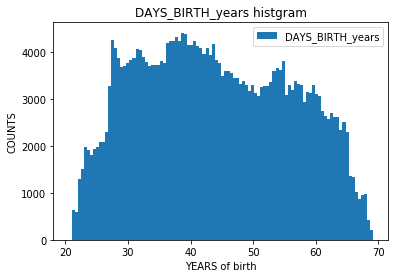

In [18]:
plt.hist(app_train["DAYS_BIRTH_years"],bins=100,label="DAYS_BIRTH_years")
plt.xlabel("YEARS of birth")
plt.ylabel("COUNTS")
plt.title("DAYS_BIRTH_years histgram")
plt.legend()
plt.show()

In [26]:
years_birth_cut= [20,30,35,40,45,50,55,60,70]

In [50]:
app_train["DAYS_BIRTH_years_cut"] = pd.cut(app_train["DAYS_BIRTH_years"],years_birth_cut)
Birth_years_cut=list(app_train["DAYS_BIRTH_years_cut"].unique().sort_values())
Birth_years_cut
print(app_train.groupby("DAYS_BIRTH_years_cut")["TARGET"].value_counts())

DAYS_BIRTH_years_cut  TARGET
(20, 30]              0         39863
                      1          5158
(30, 35]              0         35385
                      1          4055
(35, 40]              0         39035
                      1          3833
(40, 45]              0         38156
                      1          3250
(45, 50]              0         32529
                      1          2606
(50, 55]              0         32602
                      1          2340
(55, 60]              0         31288
                      1          1832
(60, 70]              0         33828
                      1          1751
Name: TARGET, dtype: int64


In [52]:
Birth_years_cut

[Interval(20, 30, closed='right'),
 Interval(30, 35, closed='right'),
 Interval(35, 40, closed='right'),
 Interval(40, 45, closed='right'),
 Interval(45, 50, closed='right'),
 Interval(50, 55, closed='right'),
 Interval(55, 60, closed='right'),
 Interval(60, 70, closed='right')]

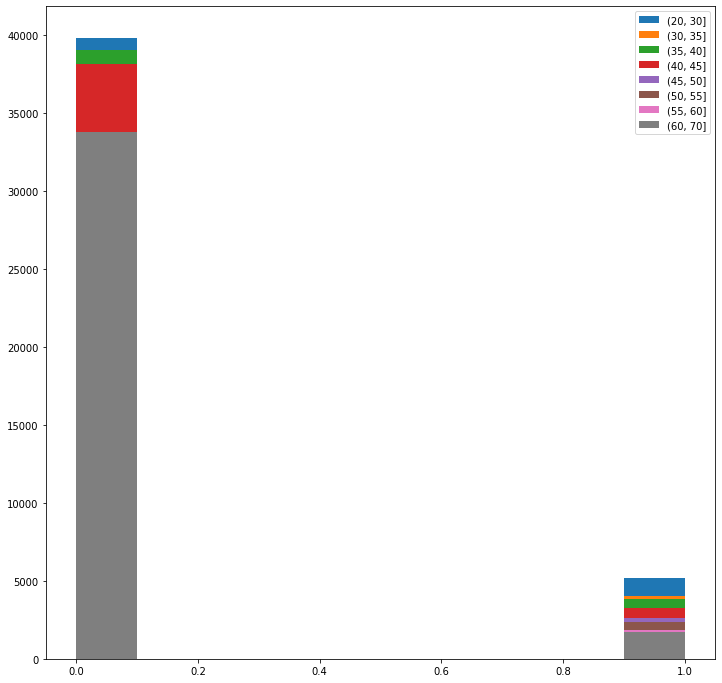

In [58]:
plt.figure(figsize=(12,12))
for i in range(len(Birth_years_cut)):
    plt.hist(app_train[app_train["DAYS_BIRTH_years_cut"]==Birth_years_cut[i]]["TARGET"],label=str(Birth_years_cut[i]))

plt.xlabel="TARGET"
plt.ylabel="Birth_years_cut_counts"
plt.title="Birth_years_cut_target_histgram"
plt.legend()
plt.show()

In [59]:
print(app_train.groupby("DAYS_BIRTH_years_cut")["TARGET"].describe())

                        count      mean       std  min  25%  50%  75%  max
DAYS_BIRTH_years_cut                                                      
(20, 30]              45021.0  0.114569  0.318504  0.0  0.0  0.0  0.0  1.0
(30, 35]              39440.0  0.102814  0.303720  0.0  0.0  0.0  0.0  1.0
(35, 40]              42868.0  0.089414  0.285344  0.0  0.0  0.0  0.0  1.0
(40, 45]              41406.0  0.078491  0.268946  0.0  0.0  0.0  0.0  1.0
(45, 50]              35135.0  0.074171  0.262053  0.0  0.0  0.0  0.0  1.0
(50, 55]              34942.0  0.066968  0.249970  0.0  0.0  0.0  0.0  1.0
(55, 60]              33120.0  0.055314  0.228596  0.0  0.0  0.0  0.0  1.0
(60, 70]              35579.0  0.049214  0.216318  0.0  0.0  0.0  0.0  1.0


In [60]:
import seaborn as sns

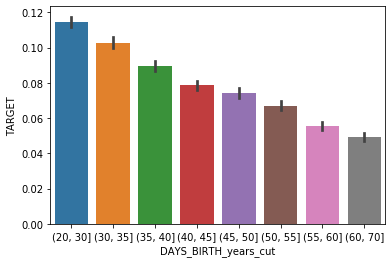

In [61]:
sns.barplot(x="DAYS_BIRTH_years_cut",y="TARGET",data=app_train)